# Kristin Meier 
# Hw

## Exercise 1 – Procedural vs Functional Programming
Write a program (function!) that takes a list of mixed integers and strings. 
The function returns the Count of the integer’s items and the word count of the strings items.
Write two different functions to do this - one using a loop (procedural) and constructing a list, 
and another using comprehension (functional).
Test your code using randomly generated lists (random numbers and random words with random order)
Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions 
for different list sizes.
Example: L = [2, 3, ’word’, -1, ’python programming language’, 9, 321]
Count of Numbers: 5
Count of words: 4


### HELPFUL LINKS
- (http://matplotlib.org/1.3.1/api/pyplot_api.html)
- (http://www.geeksforgeeks.org/timeit-python-examples/)
- (http://www.python-course.eu/numpy.php)
- (https://pypi.python.org/pypi/RandomWords/0.1.5)

In [1]:
# input list example
L = [2, 3, 'word', -1, 'python programming language', 9, 321]

### Functions
- Procedural function: ex1procedural()
- Functional function: ex1functional()

**Output format: [Count of integers, Count of words]**

In [2]:
# procedural method
def ex1procedural(list):
# initialize counts
    count_int = 0
    count_words = 0
# loop through 
    for x in list:
        # count of integers
        if type(x) == int:
            count_int += 1
        # count of words
        if type(x) == str:
            count_words += len(x.split())
    return [count_int,count_words]
    
    
# list comprehension method
def ex1functional(list):
    return [sum([1 for x in list if type(x) == int]),sum([len(x.split()) for x in list if type(x) == str])]

### Randomly generated list
- Function to generate list: randlist(length)
    - length = list length
    - Assumptions:
        - list length must be >= 2
            - if = 2, list will consist of 1 word and 1 integer
        - integers will range in value from 1 to 100,000

In [3]:
# generating random list to test
# randomly generated lists (random numbers and random words with random order)

import random
from random_words import RandomWords
rw = RandomWords()

def randlist(length=25):
    # length is the length of the list
    num_numbers = random.sample(range(1, length-1), 1)[0]
    num_words = length - num_numbers
    # random list of numbers
    numlist = random.sample(range(1, 100000), num_numbers)
    # random list of words
    wordlist = rw.random_words(count=num_words)
    # combine lists
    thelist = numlist + wordlist
    # randomly order
    random.shuffle(thelist)
    return thelist

### Use timeit to test both solutions

- loops through different list lengths to calculate the time for both functions
- starting with list length 5 up to 1000

In [4]:
# calculate the times 
import timeit

proceduraltimes = []
functionaltimes = []
listlength = []

for i in list(range(5, 2000, 100)):
    input = randlist(i)
    
    new_procedural_time = timeit.timeit(lambda: ex1procedural(input), number=1000)
    new_functional_time = timeit.timeit(lambda: ex1functional(input), number=1000)

    proceduraltimes = proceduraltimes + [new_procedural_time]
    functionaltimes = functionaltimes + [new_functional_time]
    listlength = listlength + [len(input)]


### Use matplotlib to graph performance difference

Originally my random list generator function created a list made up of the same amount of words as integers, just in a random order. The graph showed a clear linear pattern. Now my list is created with the count of words and integers varying (also randomly chosen) and the graph is a bit messier. The functional still performs slightly better as the list length increases.

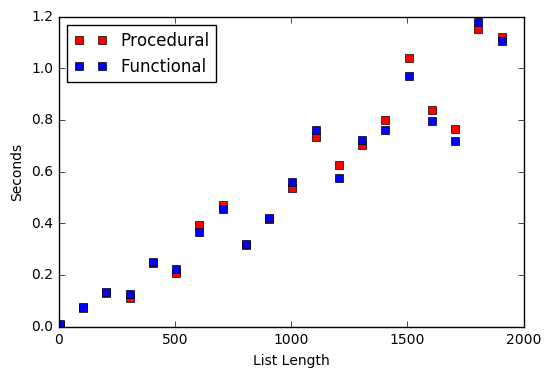

In [5]:
import matplotlib.pyplot as plt
import pylab

x = listlength
y = proceduraltimes
z = functionaltimes

plt.plot(x, y, 'rs', x, z, 'bs')
plt.xlabel('List Length')
plt.ylabel('Seconds')
plt.legend( ('Procedural', 'Functional'), loc='upper left' )


plt.show()